<H1> Generalized Linear Models

Recall the linear model

$$y = \alpha + \beta x + \epsilon$$


Linear models are appropriate where the response variable ($y$) is continuous and the errors ($\epsilon$) are normally distributed. Many experimental designs (for example, case-control) have categorical outcomes and/or outcomes whose errors are not normally distributed. Often, these experiments may be modeled with a more general category of models called 'generalized linear models' (or GLMs).

To understand GLMs, we need to be more precise about what our linear regression is actually doing. We are really saying:

$$y = \mu + \epsilon$$ 

or equivalently

$$\mathbb{E}(Y|x) = \mu = \alpha + \beta x$$

That is, our model is specifying the conditional expectation of observations $Y$ on the idependent variable $x$. In particular, that expectation is *linear*. 

## What Happens When $\mathbb{E}(Y|x)$ is Not Linear?

A natural question to ask is: Can we find a function of the expectation that *is* linear? We would like this function to be invertible, so that we are really just transforming things. The answer is 'yes' - if - we assume that $Y$ has a distribution that is part of the 'exponential family'.

This family has the following form (note - this is vector notation)

$$f_Y(y|\theta) = h(y) g(\theta)exp(\eta(\theta)\cdot T(x))$$

Kinda ugly, but also pretty general. Note that the normal distribution is in this family! So is the binomial, negative binomial, Poisson, Gamma,...



### Model

Suppose our outcome variable $Y$ has a distribution in the exponential family. We need an invertible function $g$ so that:

$$\mathbb{E}(Y|x) = \mu = g^{-1}(\alpha + \beta x)$$

Why???

Because when we apply $g$ to the expectation:

$$g(\mu) = g(g^{-1}(\alpha + \beta x))$$

a miracle occurs...

$$g(\mu) = \alpha + \beta x$$

Because it has miraculous properties, we give $g$ a name: $g$ is called a 'link' function. It 'links' the conditional expectation of our outcome variable to a linear function. Everybody loves linear functions! Yay!

Now, DESeq2 uses a negative binomial model, and we'll talk about that - but first lets look at a model that is commonly used in case-control type settings.



## Logistic Regression

In logistic regression, we model the *probability* of the outcome $y$, given the independent variable $x$. That is, 
$Y|x$ is Bernoulli, with success probability $p$ given by: 

$$\mathbb{E}(Y|x) = p = \frac{1}{1+e^{-(\alpha + \beta x)}}$$

Note that $p$ is bounded between $0$ and $1$ and is defined for all values of $\alpha + \beta x$.

We use the notation $expit(t)$ to denote the following:

$$expit(t) = \frac{1}{1+e^{-t}}$$

$expit$ is known as the *logistic function*.

and $logit(t)$ to denote:

$$logit(t) = \log\left(\frac{1}{1-t}\right)$$

Note that:

$$logit(expit(t)) = t$$

so that 

$$logit(p) = \alpha + \beta x$$

Because $logit(p) = logit(\mathbb{E}(Y|x))$, it is called the *link* function. 

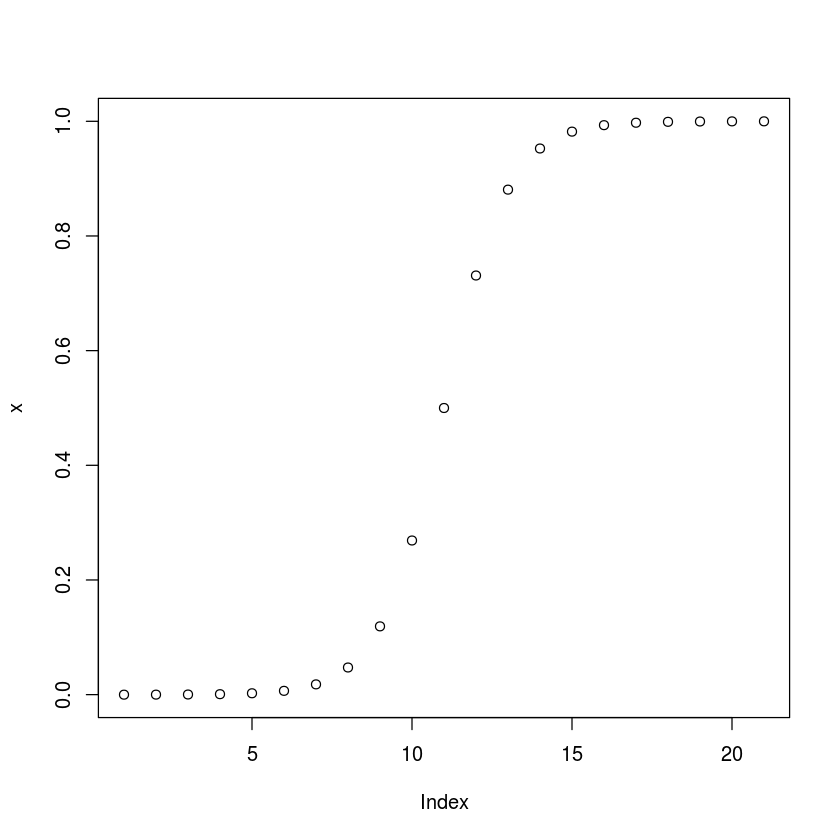

In [55]:
expit<-function(t){
    return(1/(1+exp(-t)))
}
x<-expit((-10:10))
plot(x)


So, how do we perform a logistic regression in R? First, let's get a data set:

In [56]:
Titanic<-read.csv("titanic.csv")

In [70]:
#Titanic
library(plyr)
Titanic$pclass<-revalue(Titanic$pclass, c("1st"=1, "2nd"=1,"3rd"=0))
Titanic
attach(Titanic)

The following `from` values were not present in `x`: 1st, 2nd, 3rd


,row.names,pclass,survived,name,age,embarked,home.dest,room,ticket,boat,sex
1,1,1,1,"Allen, Miss Elisabeth Walton",29,Southampton,"St Louis, MO",B-5,24160 L221,2,female
2,2,1,0,"Allison, Miss Helen Loraine",2,Southampton,"Montreal, PQ / Chesterville, ON",C26,,,female
3,3,1,0,"Allison, Mr Hudson Joshua Creighton",30,Southampton,"Montreal, PQ / Chesterville, ON",C26,,(135),male
4,4,1,0,"Allison, Mrs Hudson J.C. (Bessie Waldo Daniels)",25,Southampton,"Montreal, PQ / Chesterville, ON",C26,,,female
5,5,1,1,"Allison, Master Hudson Trevor",0.9167,Southampton,"Montreal, PQ / Chesterville, ON",C22,,11,male
6,6,1,1,"Anderson, Mr Harry",47,Southampton,"New York, NY",E-12,,3,male
7,7,1,1,"Andrews, Miss Kornelia Theodosia",63,Southampton,"Hudson, NY",D-7,13502 L77,10,female
8,8,1,0,"Andrews, Mr Thomas, jr",39,Southampton,"Belfast, NI",A-36,,,male
9,9,1,1,"Appleton, Mrs Edward Dale (Charlotte Lamson)",58,Southampton,"Bayside, Queens, NY",C-101,,2,female
10,10,1,0,"Artagaveytia, Mr Ramon",71,Cherbourg,"Montevideo, Uruguay",,,(22),male


The following objects are masked from Titanic (pos = 3):

    age, boat, embarked, home.dest, name, pclass, room, row.names, sex,
    survived, ticket



In [71]:
fit.survive<-glm(survived ~ sex + age +pclass,family= "binomial")

In [72]:
summary(fit.survive)


Call:
glm(formula = survived ~ sex + age + pclass, family = "binomial")

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.4769  -0.7492  -0.3575   0.5649   2.5268  

Coefficients:
             Estimate Std. Error z value Pr(>|z|)    
(Intercept)  3.081623   0.346294   8.899  < 2e-16 ***
sexmale     -2.974112   0.229754 -12.945  < 2e-16 ***
age         -0.030861   0.007567  -4.078 4.54e-05 ***
pclass0     -1.869167   0.267633  -6.984 2.87e-12 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 869.54  on 632  degrees of freedom
Residual deviance: 570.20  on 629  degrees of freedom
  (680 observations deleted due to missingness)
AIC: 578.2

Number of Fisher Scoring iterations: 5


In [73]:
fit.survive<-glm(survived ~ sex + age + pclass + sex:pclass + age:pclass,family= "binomial")

In [75]:
summary(fit.survive)


Call:
glm(formula = survived ~ sex + age + pclass + sex:pclass + age:pclass, 
    family = "binomial")

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.6812  -0.7031  -0.4615   0.4576   2.3295  

Coefficients:
                 Estimate Std. Error z value Pr(>|z|)    
(Intercept)      3.633006   0.443754   8.187 2.68e-16 ***
sexmale         -3.608091   0.317038 -11.381  < 2e-16 ***
age             -0.033241   0.008975  -3.704 0.000213 ***
pclass0         -2.875136   0.643407  -4.469 7.87e-06 ***
sexmale:pclass0  1.792788   0.488468   3.670 0.000242 ***
age:pclass0     -0.002029   0.019189  -0.106 0.915799    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 869.54  on 632  degrees of freedom
Residual deviance: 556.58  on 627  degrees of freedom
  (680 observations deleted due to missingness)
AIC: 568.58

Number of Fisher Scoring iterations: 5


In [62]:
detach(Titanic)

## Negative Binomial

When $Y$ follows a negative binomial distribution, we model the mean as:

$$\mathbb{E}(Y|x) = exp(\alpha + \beta x)$$



What is the link function?

The following example is lifted from http://www.ats.ucla.edu/stat/r/dae/nbreg.htm

In [63]:
library(foreign)
library(ggplot2)
library(MASS)
dat <- read.dta("http://www.ats.ucla.edu/stat/stata/dae/nb_data.dta")

In [64]:
dat

,id,gender,math,daysabs,prog
1,1001,male,63,4,2
2,1002,male,27,4,2
3,1003,female,20,2,2
4,1004,female,16,3,2
5,1005,female,2,3,2
6,1006,female,71,13,2
7,1007,female,63,11,2
8,1008,male,3,7,2
9,1009,male,51,10,2
10,1010,male,49,9,3


In [65]:
dat <- within(dat, {
    prog <- factor(prog, levels = 1:3, labels = c("General", "Academic", "Vocational"))
    id <- factor(id)
})

summary(dat)

       id         gender         math          daysabs               prog    
 1001   :  1   female:160   Min.   : 1.00   Min.   : 0.000   General   : 40  
 1002   :  1   male  :154   1st Qu.:28.00   1st Qu.: 1.000   Academic  :167  
 1003   :  1                Median :48.00   Median : 4.000   Vocational:107  
 1004   :  1                Mean   :48.27   Mean   : 5.955                   
 1005   :  1                3rd Qu.:70.00   3rd Qu.: 8.000                   
 1006   :  1                Max.   :99.00   Max.   :35.000                   
 (Other):308                                                                 

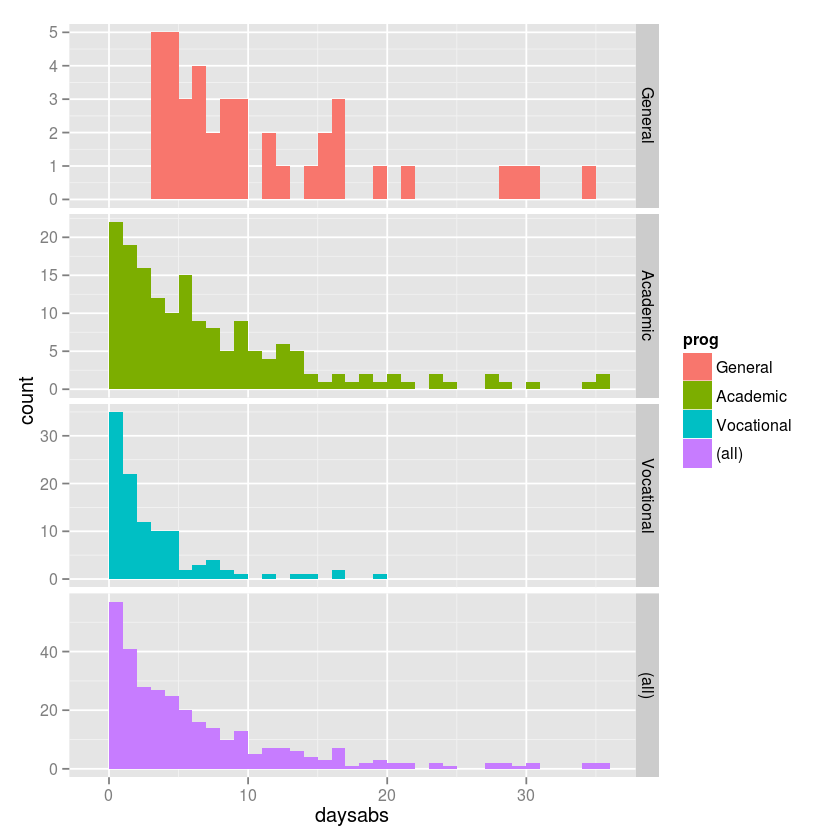

In [66]:
ggplot(dat, aes(daysabs, fill = prog)) + geom_histogram(binwidth = 1) + facet_grid(prog ~ 
    ., margins = TRUE, scales = "free")

In [67]:
m1 <- glm.nb(daysabs ~ math + prog, data = dat)

In [68]:
summary(m1)


Call:
glm.nb(formula = daysabs ~ math + prog, data = dat, init.theta = 1.032713156, 
    link = log)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.1547  -1.0192  -0.3694   0.2285   2.5273  

Coefficients:
                Estimate Std. Error z value Pr(>|z|)    
(Intercept)     2.615265   0.197460  13.245  < 2e-16 ***
math           -0.005993   0.002505  -2.392   0.0167 *  
progAcademic   -0.440760   0.182610  -2.414   0.0158 *  
progVocational -1.278651   0.200720  -6.370 1.89e-10 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for Negative Binomial(1.0327) family taken to be 1)

    Null deviance: 427.54  on 313  degrees of freedom
Residual deviance: 358.52  on 310  degrees of freedom
AIC: 1741.3

Number of Fisher Scoring iterations: 1


              Theta:  1.033 
          Std. Err.:  0.106 

 2 x log-likelihood:  -1731.258 